<a href="https://colab.research.google.com/github/Chan3377/Food_Demand_Forecasting/blob/main/Food_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Demand Forecasting**

The goal of the project is to ues the data collected from food industry to forecast the food demand for restaurant to manage and optimize their stock more efficiency.

## **Import Libraries**

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import joblib

## **Load train dataset**

In [81]:
file_path = "/content/drive/MyDrive/dataset/train_food_demand.csv"
data = pd.read_csv(file_path, dtype=str)
df = data.copy()
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.5,437.53,0,0,54
4,1448490,1,55,2631,243.5,242.5,0,0,40


In [82]:
df.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.5,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [83]:
df.dtypes

,0
id,object
week,object
center_id,object
meal_id,object
checkout_price,object
base_price,object
emailer_for_promotion,object
homepage_featured,object
num_orders,object


In [84]:
df.shape

(456548, 9)

In [85]:
df['emailer_for_promotion'].value_counts()

,count
emailer_for_promotion,
0,419498
1,37050


In [86]:
df['homepage_featured'].value_counts()

,count
homepage_featured,
0,406693
1,49855


In [87]:
df.describe(include='all')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548,456548,456548,456548,456548,456548,456548,456548,456548
unique,456548,145,77,51,1992,1907,2,2,1250
top,1379560,122,13,2290,290.03,292.03,0,0,13
freq,1,3359,7046,11138,7342,9513,419498,406693,12397


In [88]:
df.groupby('meal_id')['num_orders'].count().max()

11138

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     456548 non-null  object
 1   week                   456548 non-null  object
 2   center_id              456548 non-null  object
 3   meal_id                456548 non-null  object
 4   checkout_price         456548 non-null  object
 5   base_price             456548 non-null  object
 6   emailer_for_promotion  456548 non-null  object
 7   homepage_featured      456548 non-null  object
 8   num_orders             456548 non-null  object
dtypes: object(9)
memory usage: 31.3+ MB


## **Exploratory data analysis**

In [90]:
num_orders_sorted = df.sort_values(by='num_orders', ascending=False)

In [91]:
num_orders_sorted.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
179216,1335482,60,174,2664,271.6,321.13,0,0,999
278824,1363317,91,67,2290,297.85,296.85,0,0,999
156309,1467399,53,27,2322,291.06,475.33,0,1,999
250662,1391422,83,24,1993,146.53,145.5,0,1,999
452189,1006097,144,67,2707,238.68,237.68,0,0,999


In [92]:
df.isnull().sum()

,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0
num_orders,0


In [93]:
df.isna().sum()

,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0
num_orders,0


In [94]:
df.dropna(inplace=True)

In [95]:
df.duplicated().sum()

0

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.5,437.53,0,0,54
4,1448490,1,55,2631,243.5,242.5,0,0,40


In [98]:
# Converting multiple columns to integers

df[['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'num_orders']] = df[['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'num_orders']].astype(int)

In [99]:
# Converting price columns to float

df[['checkout_price', 'base_price']] = df[['checkout_price', 'base_price']].astype(float)

In [100]:
df['week'].value_counts().sort_values(ascending=False).head(10)

,count
week,
122,3359
105,3348
106,3347
140,3332
123,3331
134,3330
133,3324
113,3312
100,3309


In [101]:
df.groupby('center_id')['num_orders'].mean().sort_values(ascending=False).head(10).astype(int)

,num_orders
center_id,
13,609
43,562
10,481
137,452
52,446
11,411
67,410
174,405
24,381


In [102]:
df.groupby('center_id')['num_orders'].mean().sort_values(ascending=False).head(10).astype(int)

,num_orders
center_id,
13,609
43,562
10,481
137,452
52,446
11,411
67,410
174,405
24,381


In [103]:
df.groupby(['checkout_price',	'base_price'])['num_orders'].mean().head(10).reset_index()

,checkout_price,base_price,num_orders
0,2.97,316.25,14.0
1,45.62,253.23,123.0
2,47.59,253.23,163.0
3,53.41,86.39,134.0
4,55.35,55.35,82.0
5,55.35,191.09,163.0
6,55.35,212.43,81.0
7,56.26,319.13,229.0
8,58.26,209.55,80.0
9,64.02,65.02,13.0


In [104]:
df.select_dtypes(include=['number']).corr()['num_orders']

,num_orders
week,-0.017210
center_id,-0.053035
meal_id,0.010597
checkout_price,-0.282108
base_price,-0.222306
emailer_for_promotion,0.277147
homepage_featured,0.294490
num_orders,1.000000


<Axes: >

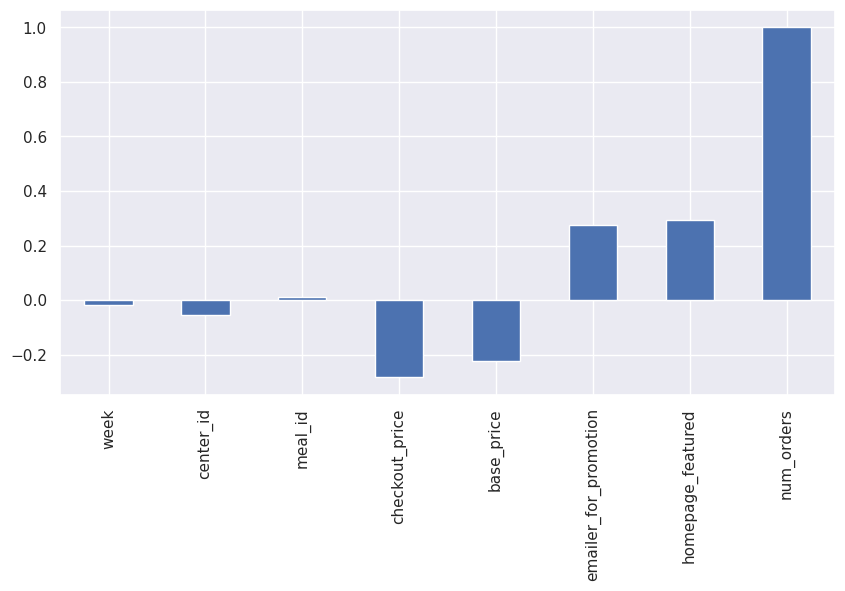

In [105]:
df.select_dtypes(include=['number']).corr()['num_orders'].plot(kind='bar', figsize=(10, 5))

## **Train Test Split**

####Splitting the data to feature Input and Target

In [106]:
input = df[['meal_id', 'emailer_for_promotion', 'homepage_featured', 'checkout_price', 'base_price']]
target = df['num_orders']

In [107]:
input, target

(        meal_id  emailer_for_promotion  homepage_featured  checkout_price  \
 0          1885                      0                  0          136.83   
 1          1993                      0                  0          136.83   
 2          2539                      0                  0          134.86   
 3          2139                      0                  0          339.50   
 4          2631                      0                  0          243.50   
 ...         ...                    ...                ...             ...   
 456543     1543                      0                  0          484.09   
 456544     2304                      0                  0          482.09   
 456545     2664                      0                  0          237.68   
 456546     2569                      0                  0          243.50   
 456547     2490                      0                  0          292.03   
 
         base_price  
 0           152.29  
 1           135.8

####Split the data into Training data and Testing data

In [140]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=2)

In [141]:
print(input.shape, x_train.shape, x_test.shape)
print(target.shape, y_train.shape, y_test.shape)

(456548, 5) (365238, 5) (91310, 5)
(456548,) (365238,) (91310,)


In [142]:
x_test[:1], y_test[:1]

(        meal_id  emailer_for_promotion  homepage_featured  checkout_price  \
 135598     2306                      0                  0          340.53   
 
         base_price  
 135598      338.53  ,
 135598    26
 Name: num_orders, dtype: int64)

In [143]:
y_train.value_counts()

,count
num_orders,
13,9910
15,9843
14,9800
28,9267
27,9186
...,...
3604,1
3727,1
7898,1


In [144]:
y_test.value_counts()

,count
num_orders,
13,2487
14,2470
15,2451
26,2348
28,2281
...,...
2524,1
4414,1
3268,1


## **Load test dataset**

In [113]:
file_path = "/content/drive/MyDrive/dataset/test_food_demand.csv"
data = pd.read_csv(file_path, dtype=str)
df_test = data.copy()
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [114]:
df_test.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0
32572,1291286,155,61,2490,276.45,276.45,0,0


## **Exploratory data analysis**

In [115]:
df_test.isnull().sum()

,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0


In [116]:
df_test.isna().sum()

,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0


In [117]:
df_test.dropna(inplace=True)

In [118]:
df_test.duplicated().sum()

0

In [119]:
df_test.drop_duplicates(inplace=True)

In [120]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [121]:
# Converting multiple columns to integers

df_test[['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']] = df_test[['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']].astype(int)

In [122]:
# Converting price columns to float

df_test[['checkout_price', 'base_price']] = df_test[['checkout_price', 'base_price']].astype(float)

In [123]:
df_test['week'].value_counts().sort_values(ascending=False).head(10)

,count
week,
148,3332
149,3313
150,3277
147,3271
153,3268
152,3242
146,3240
154,3228
151,3224


## **Features engineering**

In [124]:
input_features = df_test[['meal_id', 'emailer_for_promotion', 'homepage_featured', 'checkout_price', 'base_price']]

In [125]:
input_features.head()

,meal_id,emailer_for_promotion,homepage_featured,checkout_price,base_price
0,1885,0,0,158.11,159.11
1,1993,0,0,160.11,159.11
2,2539,0,0,157.14,159.14
3,2631,0,0,162.02,162.02
4,1248,0,0,163.93,163.93


## **Features Scaling**

In [126]:
scaler = StandardScaler()

In [127]:
# import scaler for inference use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

####Features from train dataset

In [128]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [129]:
# check what inside x_train_scaled
x_train_scaled

array([[-1.41787276, -0.29726907, -0.35035329, -1.16336478, -1.23746638],
       [-1.30278788, -0.29726907, -0.35035329, -1.20122435, -1.28594485],
       [-1.45075416, -0.29726907, -0.35035329,  0.86607791,  0.70024104],
       ...,
       [-0.26702391, -0.29726907, -0.35035329, -0.33902016, -0.45913492],
       [-0.26702391, -0.29726907, -0.35035329, -0.33248138, -0.45291175],
       [-1.75764719, -0.29726907,  2.85426173, -1.1191626 , -1.0624087 ]])

In [130]:
x_train_scaled.shape

(410893, 5)

In [131]:
x_test_scaled.shape

(45655, 5)

####Features from test dataset

In [132]:
input_features_scaled = scaler.transform(input_features)

In [133]:
# check what inside input_features_scaled
input_features_scaled

array([[-0.2542367 , -0.29726907, -0.35035329, -1.13819046, -1.21350719],
       [-0.05694833, -0.29726907, -0.35035329, -1.12511289, -1.21350719],
       [ 0.94045401, -0.29726907, -0.35035329, -1.14453308, -1.21332049],
       ...,
       [ 1.16879704, -0.29726907, -0.35035329, -0.06609128, -0.19315677],
       [ 0.99525634, -0.29726907, -0.35035329, -0.06609128, -0.19315677],
       [ 0.85094354, -0.29726907, -0.35035329, -0.36439065, -0.4832808 ]])

In [134]:
input_features_scaled.shape

(32573, 5)

## **Model Training & Evaluation**

####**Linear Regression**

#####Use Train dataset

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [43]:
y_test_pred = lr.predict(x_test_scaled)

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
mean_absolute_error(y_test, y_test_pred)

202.46611295636262

#####Use Test dataset

In [151]:
y_test_pred_test = lr.predict(input_features_scaled)

In [156]:
average_num_orders = mean_absolute_error(y_test[:32573], y_test_pred_test)

In [160]:
print(f"The average order for the next 10 weeks is: {average_num_orders:0.2f}")

The average order for the next 10 weeks is: 248.69


In [157]:
df['num_orders'].mean()

261.8727603669275

In [155]:
df['num_orders'].describe().astype(int)

,num_orders
count,456548
mean,261
std,395
min,13
25%,54
50%,136
75%,324
max,24299


In [48]:
# import model
joblib.dump(lr, 'model.pkl')

['model.pkl']